# Post-processing planar tangential pressure with large fluctuations
The idea here is:
1. Integrate P_T over the space. We found integration starting from the liquid phase gives more stable results.
2. Fit the numerically integrated data (int P_T dy) with an integrated skewed Gaussian function. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = '15'

In [ ]:
from scipy.special import erf
def ptffunc(x, A, x0, sig, alp):
    gaussian = A * np.exp(-((x - x0)**2) / (2 * sig**2))
    skew = (1 + erf(alp * (x - x0) / np.sqrt(2)))
    return gaussian * skew +6.686423053

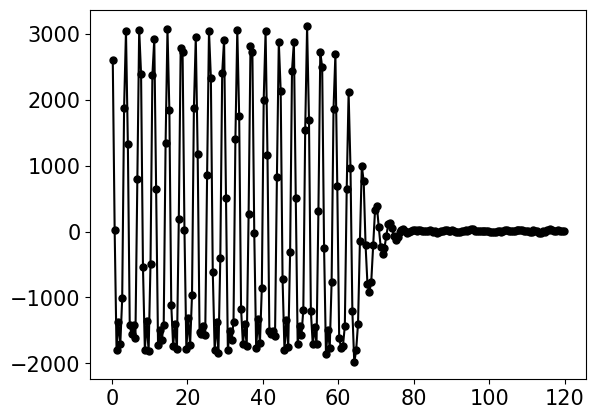

In [20]:
# read file into numpy array and convert string to float
data = np.loadtxt('P_T_planar_ih_basal_1bar_07212023.txt', delimiter='\t', skiprows=1, dtype=float)

# plot the tangential pressure data
plt.plot(data[:,0],data[:,1],marker='o',linestyle='-',color='black',markersize=5,label=r'$P_{T}$')


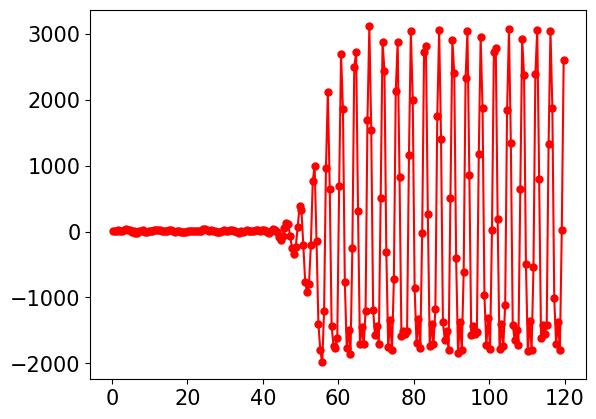

In [21]:
# print data[:,1] in reverse order, from last element to first element
data[:,1]= data[:,1][::-1]

# plot the tangential pressure profile starting from the liquid phase.
plt.plot(data[:,0],data[:,1],marker='o',linestyle='-',color='red',markersize=5)

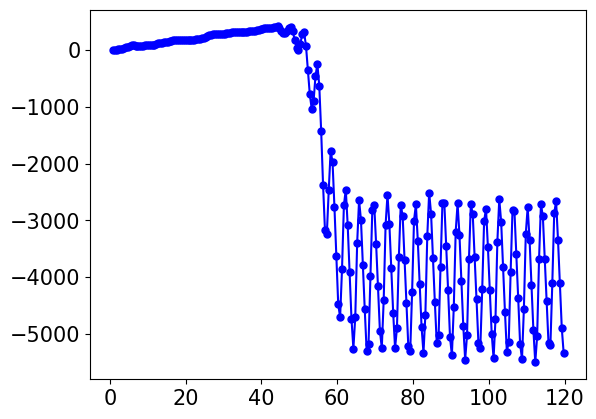

In [ ]:
intgl_numeric = np.array([])
# integrate data 
for i in range(1,len(data)):
    #intgl_numeric = np.append(intgl_numeric,np.trapz(data[:i,1],data[:i,0])/data[i,0])
    intgl_numeric = np.append(intgl_numeric,np.trapz(data[:i,1],data[:i,0]))


# plot the data
plt.plot(data[1:,0],intgl_numeric,marker='o',linestyle='-',color='blue',markersize=5)

In [44]:
# Gaussian fit
# integrate ptffunc
def intgl_fit(x,A, x0, sig, alp):

    intgl = np.array([])
    for i in range(1,len(x)):
        intgl = np.append(intgl, np.trapz(ptffunc(x[:i],A, x0, sig, alp),x[:i]))


    return intgl



# find best fit parameters for fitting function 
from scipy.optimize import curve_fit
popt, pcov = curve_fit(intgl_fit, data[:,0], intgl_numeric, 
                       p0=[-500,50,3,50],)
                       #bounds=([0,0,20,0,-1000],[100,100,100,100,1000]))

popt

array([-307.27647317,   51.90781991,    6.02195643,    0.39786938])

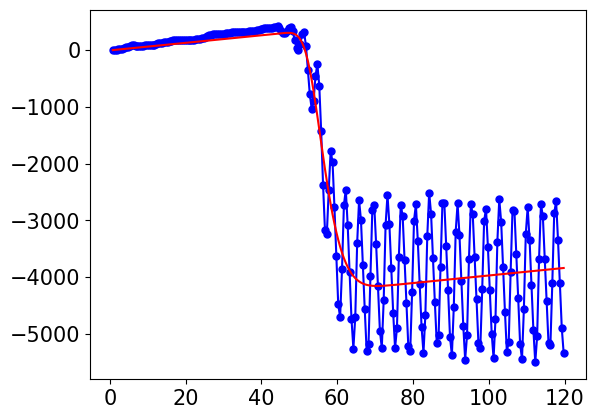

In [45]:
# plot the original data
plt.plot(data[1:,0],intgl_numeric,marker='o',linestyle='-',color='blue',markersize=5,label='original')

# plot the fitted curve
plt.plot(data[1:,0],intgl_fit(data[:,0],*popt),linestyle='-',color='red',label='fitted')


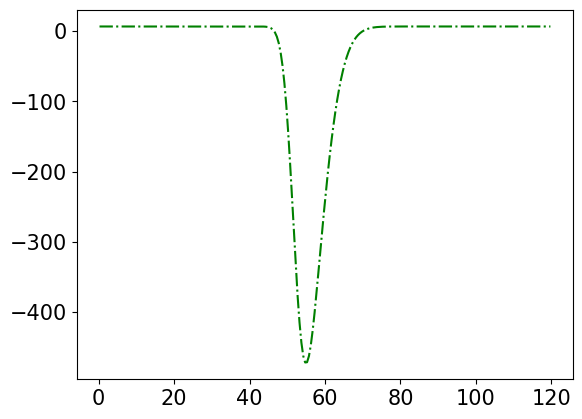

In [46]:
# plot ptffunc
plt.plot(data[:,0],ptffunc(data[:,0],*popt),'-.',color='green',label='fitting curve')

In [49]:
#write data[:,0] and ptffunc to a txt file with two columns
np.savetxt('ptffunc.txt',np.column_stack((data[:,0],ptffunc(data[:,0],*popt))),delimiter='\t',header='x\ty')